In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

## # Read Dataset

In [6]:
tbc_dir = os.path.join('clean_dataset', 'tbc_incidence.csv')
u5_dir = os.path.join('clean_dataset', 'under5_mortality.csv')
adl_dir = os.path.join('clean_dataset', 'adult_mortality.csv')

In [7]:
tbc_data = pd.read_csv(tbc_dir)
u5_data = pd.read_csv(u5_dir)
adl_data = pd.read_csv(adl_dir)

In [35]:
health_dataset = pd.merge(tbc_data, u5_data.drop('HDI Rank (2017)', axis=1), on='Country')

In [38]:
health_dataset = pd.merge(health_dataset, adl_data.drop('HDI Rank (2017)', axis=1), on='Country')

In [40]:
health_dataset

,HDI Rank (2017),Country,2000_x,2005_x,2010_x,2011_x,2012_x,2013_x,2014_x,2015_x,...,2016_y,2000,2005,2010,2011,2012,2013,2014,2015,2016
0,168.0,Afghanistan,190.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,...,70.4,334.0,300.0,271.0,266.0,261.0,257.0,253.0,249.0,245.0
1,68.0,Albania,22.0,19.0,17.0,17.0,16.0,19.0,16.0,16.0,...,13.5,124.0,109.0,93.0,88.0,84.0,83.0,81.0,80.0,79.0
2,85.0,Algeria,74.0,80.0,77.0,73.0,73.0,67.0,72.0,74.0,...,25.2,159.0,133.0,116.0,114.0,112.0,110.0,109.0,107.0,106.0
3,147.0,Angola,297.0,368.0,384.0,383.0,380.0,376.0,370.0,370.0,...,82.5,408.0,355.0,307.0,298.0,289.0,286.0,283.0,280.0,277.0
4,70.0,Antigua and Barbuda,5.5,7.7,8.5,7.2,3.6,12.0,3.5,5.0,...,8.5,180.0,171.0,162.0,160.0,158.0,156.0,155.0,153.0,151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,78.0,Venezuela (Bolivarian Republic of),33.0,32.0,28.0,27.0,27.0,27.0,26.0,29.0,...,16.3,217.0,210.0,202.0,201.0,199.0,197.0,195.0,193.0,191.0
139,116.0,Viet Nam,197.0,176.0,155.0,151.0,147.0,144.0,140.0,137.0,...,21.6,200.0,199.0,193.0,191.0,189.0,187.0,185.0,183.0,181.0
140,178.0,Yemen,116.0,80.0,52.0,50.0,48.0,48.0,48.0,48.0,...,55.3,277.0,270.0,258.0,255.0,252.0,250.0,247.0,245.0,243.0
141,144.0,Zambia,759.0,602.0,495.0,475.0,456.0,437.0,406.0,391.0,...,63.4,642.0,556.0,421.0,392.0,363.0,359.0,355.0,350.0,346.0


# Make Cluster

In [60]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

In [62]:
clusters = {
    "kmeans": KMeans(n_clusters=7).fit(health_dataset.drop(['HDI Rank (2017)', 'Country'], axis=1)),
    "gaussian": GaussianMixture(n_components=7).fit(health_dataset.drop(['HDI Rank (2017)', 'Country'], axis=1)),
    "dbscan": DBSCAN().fit(health_dataset.drop(['HDI Rank (2017)', 'Country'], axis=1))
}

In [63]:
kmeans_label = clusters['kmeans'].predict(health_dataset.drop(['HDI Rank (2017)', 'Country'], axis=1))
gaussian_label = clusters['kmeans'].predict(health_dataset.drop(['HDI Rank (2017)', 'Country'], axis=1))
dbscan_label = clusters['kmeans'].predict(health_dataset.drop(['HDI Rank (2017)', 'Country'], axis=1))

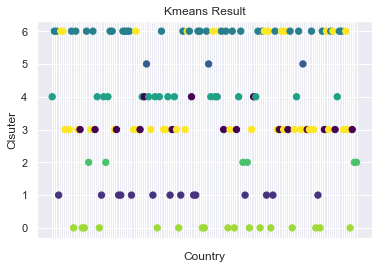

In [78]:
fig, ax = plt.subplots()
plt.title('Kmeans Result')
plt.xlabel('Country')
plt.ylabel('Clsuter')
ax.set_xticklabels([])
ax.scatter(health_dataset['Country'], kmeans_label, c=labels, s=40, cmap='viridis');
plt.savefig('result/kmeans_result.png')

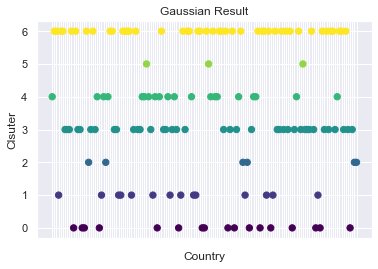

In [79]:
fig, ax = plt.subplots()
plt.title('Gaussian Result')
plt.xlabel('Country')
plt.ylabel('Clsuter')
ax.set_xticklabels([])
ax.scatter(health_dataset['Country'], kmeans_label, c=gaussian_label, s=40, cmap='viridis');
plt.savefig('result/gaussian_result.png')

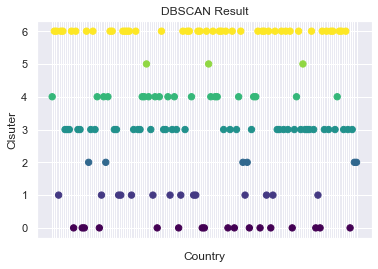

In [80]:
fig, ax = plt.subplots()
plt.title('DBSCAN Result')
plt.xlabel('Country')
plt.ylabel('Clsuter')
ax.set_xticklabels([])
ax.scatter(health_dataset['Country'], kmeans_label, c=dbscan_label, s=40, cmap='viridis');
plt.savefig('result/dbscan_result.png')